In [1]:
import torch

In [2]:
#Connecting Google Colab with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
#Check for GPU
gpu = torch.cuda.is_available()
device = 'cuda' if gpu == True else 'cpu'
#device = 'cpu'
print('Using device:', device)

Using device: cuda


In [4]:
#Directories path
train_dir = "/content/drive/MyDrive/Oranges Dataset/Train"
test_dir = "/content/drive/MyDrive/Oranges Dataset/Test"

In [5]:
from torchvision import transforms

# Image transformations
transforms = transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),  # Image net standards
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])  # Imagenet standards
    ])

In [6]:
from torchvision import datasets
from torch.utils.data import DataLoader

training_data = datasets.ImageFolder(root = train_dir, transform = transforms)
testing_data = datasets.ImageFolder(root = test_dir, transform = transforms)
'''
# Datasets from folders
data = {
    'train':
    datasets.ImageFolder(root=traindir, transform=image_transforms['train']),
    'valid':
    datasets.ImageFolder(root=validdir, transform=image_transforms['valid']),
}
'''

train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
test_loader = DataLoader(testing_data, batch_size=32, shuffle=True)

'''
# Dataloader iterators, make sure to shuffle
dataloaders = {
    'train': DataLoader(data['train'], batch_size=batch_size, shuffle=True),
    'val': DataLoader(data['valid'], batch_size=batch_size, shuffle=True)
}
'''

"\n# Dataloader iterators, make sure to shuffle\ndataloaders = {\n    'train': DataLoader(data['train'], batch_size=batch_size, shuffle=True),\n    'val': DataLoader(data['valid'], batch_size=batch_size, shuffle=True)\n}\n"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Training set size:  321
Test set size:  80


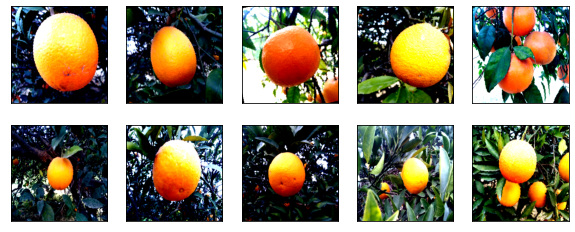

In [7]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
# obtain one batch of training images
data_iter = iter(train_loader)
images, lbls = data_iter.next()
images = images.numpy() # convert images to numpy for display
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(10, 4))
# display 20 images
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    label = lbls[idx]
    #ax.set_title(classes[label])
    #ax.set_title(classes[lbls[idx]])
print('Training set size: ', len(training_data))
print('Test set size: ', len(testing_data))

In [8]:
# Iterate through the dataloader once
train_iter = iter(train_loader)
features, labels = next(train_iter)
features.shape, labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [9]:
#Loading in a pre-trained model
from torchvision import models
model = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [10]:
# Freeze model weights
for param in model.parameters():
    param.requires_grad = False

model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [13]:
import torch.nn as nn
n_classes = 4
# add on our own custom classifier
model.classifier[6] = nn.Sequential(
                      nn.Linear(4096, 1000), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(1000, n_classes),                   
                      nn.LogSoftmax(dim=1))

In [15]:
model.classifier

Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Sequential(
    (0): Linear(in_features=4096, out_features=1000, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=1000, out_features=4, bias=True)
    (4): LogSoftmax(dim=1)
  )
)

In [14]:
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [16]:
# Find total parameters and trainable parameters
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

61,104,844 total parameters.
4,101,004 training parameters.


In [19]:
# Move to gpu
model = model.to(device)
# Distribute across 2 gpus
model = nn.DataParallel(model)
print(device)

cuda


In [20]:
from torch import optim

# Loss and optimizer
criteration = nn.NLLLoss()
criteration = criteration.to(device)
optimizer = optim.Adam(model.parameters())

In [22]:
total_step = len(train_loader)
loss_list = []
acc_list = []
n_epochs = 15
for epoch in range(n_epochs):
  for i, (images, targets) in enumerate(train_loader):
    images = images.to(device)
    targets = targets.to(device)
    # Generate predictions
    outputs = model(images)
    outputs = outputs.to(device)
    # Calculate loss
    loss = criteration(outputs, targets)
    loss_list.append(loss.item())
    # Backprop and perform Adam optimisation
    optimizer.zero_grad()
    # Backpropagation
    #loss.requires_grad = True
    loss.backward()
    # Update model parameters
    optimizer.step()
    
    # Track the accuracy
    total = targets.size(0)
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == targets).sum().item()
    acc_list.append(correct / total)
    print("Training")
    print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch + 1, n_epochs, i + 1, total_step, loss.item(),(correct / total) * 100))


Training
Epoch [1/15], Step [1/11], Loss: 1.5523, Accuracy: 18.75%
Training
Epoch [1/15], Step [2/11], Loss: 1.8900, Accuracy: 53.12%
Training
Epoch [1/15], Step [3/11], Loss: 2.1699, Accuracy: 40.62%
Training
Epoch [1/15], Step [4/11], Loss: 1.0385, Accuracy: 62.50%
Training
Epoch [1/15], Step [5/11], Loss: 1.0666, Accuracy: 62.50%
Training
Epoch [1/15], Step [6/11], Loss: 2.1223, Accuracy: 46.88%
Training
Epoch [1/15], Step [7/11], Loss: 1.1513, Accuracy: 56.25%
Training
Epoch [1/15], Step [8/11], Loss: 1.7921, Accuracy: 50.00%
Training
Epoch [1/15], Step [9/11], Loss: 0.7268, Accuracy: 68.75%
Training
Epoch [1/15], Step [10/11], Loss: 0.5619, Accuracy: 78.12%
Training
Epoch [1/15], Step [11/11], Loss: 0.0370, Accuracy: 100.00%
Training
Epoch [2/15], Step [1/11], Loss: 0.6297, Accuracy: 65.62%
Training
Epoch [2/15], Step [2/11], Loss: 0.8966, Accuracy: 65.62%
Training
Epoch [2/15], Step [3/11], Loss: 0.8967, Accuracy: 56.25%
Training
Epoch [2/15], Step [4/11], Loss: 1.1013, Accuracy:

In [23]:

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images=images.cuda()
        labels=labels.cuda()
        outputs = model(images).cuda()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy#: {} '.format((correct / total) * 100))

Test Accuracy#: 90.0 
